# <center> Newman on custom trace and user graph </center>

In [1]:
import util
import numpy as np
import networkx as nx
import random as random
from operator import itemgetter
from scipy.special import binom
import matplotlib.pyplot as plt

Load trace.

In [2]:
trace_path = "../Datasets/trace_test.txt"

Get authors.

In [3]:
Author = util.get_authors(trace_path)

Get users.

In [4]:
users = set(Author.values())
print(users)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}


In [5]:
for i,line in enumerate(open(trace_path)):
    print(line[:-1]) # [:-1] to remove \n at end of line
    if i==5:
        break

0 0 9 -1
1 0.19761178684143316 14 -1
2 0.22897749303630008 9 -1
3 0.27817540573473964 3 2
4 0.5629811737376177 24 -1
5 0.5680854304938732 40 -1


## 1. Initialization

Number of nodes $n$ and list of all node pairs.

In [6]:
n = len(users)
node_pairs = list()
for i in range(n):
    for j in range(n):
        if i != j:
            node_pairs.append((i,j))

Compute E and N. We set the number of observation N[i,j] to the max of E for each (i,j).

/!\ N[i,j] : nb obs for j-->i /!\

/!\ E[i,j] : nb edges observed for j-->i /!\

In [7]:
# init
E = {e:0 for e in node_pairs}
N = {e:0 for e in node_pairs}

# read tweets
for line in open(trace_path):
    line = line.split()
    uid, rtid = int(line[2]), int(line[3])
    
    # if retweet
    if rtid != -1:
        
#         # update N[.,uid]
#         for user in users.difference({uid}):
#             N[uid, user] += 1
            
        # if retweetd user known update E[rtu,uid]
        if rtid in Author:
            rtu = Author[rtid]
            if rtu != uid: # no self-edges
                E[uid,rtu] = min(E[uid,rtu]+1, 30)
                
N = { e:max(E.values()) for e in node_pairs}

In [8]:
print("min E, max E = ", min(E.values()), ",", max(E.values()))

min E, max E =  0 , 30


## 2. Iterations

Choose parameters.

In [12]:
repetitions = 1
max_iter = 100
verbose = True

Proceed.

In [16]:
# at each repetition we save the values of w, a and b
results = {'w':list(), 'a':list(), 'b':list()}

for k in range(repetitions):
    
    # we may have divisions by zero
    try:
    
        # random initialization of the parameters
#         w = random.uniform(0,0.2)
#         a = random.uniform(0.5,1)
#         b = random.uniform(0,0.5)
        w = 0.1
        a = 0.7
        b = 0.3
        if verbose:
            print("init values ", w, a, b)
            print()

        # iter
        for l in range(max_iter):

            old_w, old_a, old_b = w, a, b

            # compute Qij
            Q = dict()
            for (i,j) in node_pairs:
                Q[i,j] = w * a**E[i,j] * (1-a)**(N[i,j]-E[i,j])
                Q[i,j] /= w * a**E[i,j] * (1-a)**(N[i,j]-E[i,j]) + (1-w) * b**E[i,j] * (1-b)**(N[i,j]-E[i,j])
                if verbose:
                    print(w * a**E[i,j] * (1-a)**(N[i,j]-E[i,j]))
            
            # update w,a,b
            w = sum(Q.values()) / (n*(n-1))
            numerator_a, numerator_b = 0, 0
            denominator_a, denominator_b = 0, 0
            for (i,j) in node_pairs:
                numerator_a += Q[i,j] * E[i,j]
                numerator_b += (1-Q[i,j]) * E[i,j]
                denominator_a += Q[i,j] * N[i,j]
                denominator_b += (1-Q[i,j]) * N[i,j]
            a = numerator_a / denominator_a
            b = numerator_b / denominator_b
            if verbose:
                print(w,a,b)
                print()
            
            # break if no sufficient evolution
            if np.all(np.abs([a-old_a, b-old_b, w-old_w]) < 0.001):
                if verbose:
                    print(np.abs([a-old_a, b-old_b, w-old_w]))
                break
            
        # add results to results dict
        results['w'].append(w)
        results['a'].append(a)
        results['b'].append(b)
        
    except e:
        continue

init values  0.1 0.7 0.3

2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
1.1209628302930934e-16
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
2.298170681057517e-13
4.8041264155418306e-17
2.0589113209464993e-17
4.8041264155418306e-17
1.1209628302930934e-16
2.0589113209464993e-17
4.8041264155418306e-17
7.753095592072429e-15
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
1.1209628302930934e-16
7.753095592072429e-15
1.1209628302930934e-16
4.8041264155418306e-17
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
4.8041264155418306e-17
1.1209628302930934e-16
2.615579937350551e-16
2.0589113209464993e-17
6.103019853817952e-16
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
1.1209628302930934e-16
4.8041264155418306e-17
2.0589113209464993e-17
1.2512262596868698e-12
5.362398255800872e-13
6.103019853817952e-16
2.0589113209464993e-17
2.0589113209464

2.0589113209464993e-17
1.1209628302930934e-16
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
1.1209628302930934e-16
1.5895207669355408e-11
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
4.8041264155418306e-17
4.8041264155418306e-17
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
2.0589113209464993e-17
6.103019853817952e-16
4.8041264155418306e-17
1.1209628302930934e-16
2.0589113209464993e-17
2.0589113209464993e-17
1.2512262596868698e-12
7.753095592072429e-15
4.8041264155418306e-17
2.0589113209464993e-17
4.2211298223505433e-14
2.0589113209464993e-17
2.0589113209464993e-17
1.1209628302930934e-16
1.1209628302930934e-16
2.0589113209464993e-17
2.05891132094

2.0589113209464993e-17
4.8041264155418306e-17
2.0589113209464993e-17
2.0589113209464993e-17
1.424037965890855e-15
2.0589113209464993e-17
2.0589113209464993e-17
1.424037965890855e-15
2.0589113209464993e-17
6.103019853817952e-16
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
4.8041264155418306e-17
1.1209628302930934e-16
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
1.1209628302930934e-16
2.0589113209464993e-17
1.1209628302930934e-16
1.1209628302930934e-16
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
1.1209628302930934e-16
4.8041264155418306e-17
1.1209628302930934e-16
4.8041264155418306e-17
4.8041264155418306e-17
4.2211298223505433e-14
3.322755253745328e-15
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
1.1209628302930934e-16
3.322755253745328e-15
4.80412641554183

2.615579937350551e-16
2.0589113209464993e-17
4.8041264155418306e-17
4.8041264155418306e-17
6.103019853817952e-16
2.0589113209464993e-17
4.8041264155418306e-17
1.424037965890855e-15
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
2.0589113209464993e-17
1.1209628302930934e-16
2.0589113209464993e-17
4.8041264155418306e-17
4.8041264155418306e-17
2.615579937350551e-16
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
1.1209628302930934e-16
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
1.424037965890855e-15
2.0589113209464993e-17
1.1209628302930934e-16
2.0589113209464993e-17
2.0589113209464993e-17
1.424037965890855e-15
1.1209628302930934e-16
3.322755253745328e-15
3.322755253745328e-15
2.0589113209464993e-17
9.849302918817932e-14
1.1209628302930934e-16
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
4.8041264155418306e-17
2.0589113209464993e-17
4.8041264155418306e-17
6.103019853817952e-1

2.0589113209464993e-17
2.0589113209464993e-17
1.1209628302930934e-16
4.8041264155418306e-17
2.0589113209464993e-17
4.8041264155418306e-17
6.103019853817952e-16
1.1209628302930934e-16
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.298170681057517e-13
1.1209628302930934e-16
1.1209628302930934e-16
2.615579937350551e-16
4.8041264155418306e-17
4.8041264155418306e-17
4.2211298223505433e-14
4.8041264155418306e-17
1.1209628302930934e-16
2.0589113209464993e-17
4.8041264155418306e-17
1.809055638150233e-14
9.849302918817932e-14
7.753095592072429e-15
2.0589113209464993e-17
3.322755253745328e-15
4.8041264155418306e-17
2.0589113209464993e-17
4.8041264155418306e-17
2.615579937350551e-16
2.0589113209464993e-17
4.8041264155418306e-17
4.8041264155418306e-17
7.753095592072429e-15
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
1.424037965890855e-15
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
1.1209628302930934e-1

2.0589113209464993e-17
4.8041264155418306e-17
2.0589113209464993e-17
2.0589113209464993e-17
3.322755253745328e-15
2.615579937350551e-16
2.0589113209464993e-17
4.2211298223505433e-14
2.0589113209464993e-17
4.2211298223505433e-14
1.1209628302930934e-16
1.1209628302930934e-16
4.8041264155418306e-17
2.615579937350551e-16
4.8041264155418306e-17
1.1209628302930934e-16
4.8041264155418306e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.615579937350551e-16
4.8041264155418306e-17
2.0589113209464993e-17
4.2211298223505433e-14
4.8041264155418306e-17
1.1209628302930934e-16
2.0589113209464993e-17
4.8041264155418306e-17
2.615579937350551e-16
1.1209628302930934e-16
2.0589113209464993e-17
4.8041264155418306e-17
1.1209628302930934e-16
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
2.0589113209464993e-17
4.8041264155418306e-17
1.1209628302930934e-16
4.8041264155418306e-17
2.0589113209464993e-17
9.849302918817932e-14
2.058911320946499

3.325519703403326e-17
3.325519703403326e-17
2.6885304969756703e-18
7.69085065441414e-17
6.217700803551649e-18
6.217700803551649e-18
7.784626097639058e-13
2.6885304969756703e-18
7.69085065441414e-17
1.4379529384537486e-17
2.6885304969756703e-18
3.325519703403326e-17
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
1.4379529384537486e-17
6.217700803551649e-18
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
6.217700803551649e-18
1.7786448153643266e-16
6.217700803551649e-18
6.217700803551649e-18
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
2.6885304969756703e-18
9.51303153003365e-16
2.6885304969756703e-18
1.4379529384537486e-17
3.325519703403326e-17
7.69085065441414e-17
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
6.217700803551649e-18
2.6885304969756703e-18
9.51303153003365e-16
7.69085065441414e-17
1.4379529384537486e-17
2.688530496975670

2.6885304969756703e-18
4.1134297379792093e-16
2.6885304969756703e-18
2.6885304969756703e-18
2.20005627070399e-15
6.217700803551649e-18
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
1.1766938789725873e-14
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
1.4379529384537486e-17
2.6885304969756703e-18
1.4379529384537486e-17
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
1.4379529384537486e-17
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
1.7786448153643266e-16
2.6885304969756703

2.6885304969756703e-18
1.4379529384537486e-17
6.217700803551649e-18
2.721312064360924e-14
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
4.1134297379792093e-16
2.6885304969756703e-18
2.6885304969756703e-18
4.1134297379792093e-16
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
3.325519703403326e-17
2.6885304969756703e-18
1.4379529384537486e-17
3.325519703403326e-17
2.6885304969756703e-18
2.20005627070399e-15
2.6885304969756703e-18
1.4379529384537486e-17
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
3.325519703403326e-17
2.6885304969756703e-18
1.4379529384537486e-17
2.6885304969756703e-18
4.163585268776335e-12
2.721312064360924e-14
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
2.6885304969756703e-18
7.69085065441414e-17
3.325519703403326e-17
6.21

2.6885304969756703e-18
1.4379529384537486e-17
2.6885304969756703e-18
7.69085065441414e-17
2.6885304969756703e-18
1.4379529384537486e-17
1.1766938789725873e-14
6.217700803551649e-18
6.217700803551649e-18
2.6885304969756703e-18
6.217700803551649e-18
1.4379529384537486e-17
9.629025038193828e-12
7.69085065441414e-17
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.20005627070399e-15
7.69085065441414e-17
2.6885304969756703e-18
1.7786448153643266e-16
2.6885304969756703e-18
6.217700803551649e-18
5.088018029776077e-15
2.6885304969756703e-18
2.6885304969756703e-18
3.325519703403326e-17
9.51303153003365e-16
6.217700803551649e-18
2.6885304969756703e-18
1.4379529384537486e-17
1.4379529384537486e-17
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
1.4379529384537486e-17
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
9.51303153003365e-16
2.688530

3.366068154823438e-13
1.4379529384537486e-17
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
5.088018029776077e-15
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
3.325519703403326e-17
6.217700803551649e-18
2.721312064360924e-14
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
1.4379529384537486e-17
2.6885304969756703e-18
2.6885304969756703e-18
2.6885304969756703e-18
6.217700803551649e-18
2.6885304969756703e-18
1.4379529384537486e-17
6.217700803551649e-18
1.1766938789725873e-14
2.6885304969756703e-18
7.69085065441414e-17
6.217700803551649e-18
0.04040289344784504 0.5004029922097007 0.04661816075903107

3.6728849661260525e-11
3.6728849661260525e-11
3.678810317981231e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.678810317981231e-11
3.738592144606787e-11
3.678810317981231e-11
3.6728849661260525e-11
3.678810317981231e-11
3.684745229023

3.6728849661260525e-11
3.6728849661260525e-11
3.750664585238705e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.6906897146744436e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6847452290235146e-11
3.678810317981231e-11
3.732570503917263e-11
3.678810317981231e-11
3.6728849661260525e-11
3.6906897146744436e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.708580773867953e-11
3.678810317981231e-11
3.678810317981231e-11
3.6728849661260525e-11
3.714563712667066e-11
3.6728849661260525e-11
3.678810317981231e-11
3.708580773867953e-11
3.69664379038044e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.69664379038044e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.678810317981231e-11
3.6728849661260525e-11
3.6

3.6728849661260525e-11
3.6728849661260525e-11
3.678810317981231e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.678810317981231e-11
3.6728849661260525e-11
3.69664379038044e-11
3.6728849661260525e-11
3.678810317981231e-11
3.678810317981231e-11
3.854867067199746e-11
3.738592144606787e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.678810317981231e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.720556303556523e-11
3.678810317981231e-11
3.678810317981231e-11
3.708580773867953e-11
3.678810317981231e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.720556303556523e-11
3.69664379038044e-11
3.7446234998232194e-11
3.6906897146744436e-11
3.6728849661260525e-11
3.678810317981231e-11
3.6728849661260525e-11
3.702607471612844e-11
3.6728849661260525e-11
3.678810317981231e-11
3.6728849661260525e-11
3.678810317981231e-11
3.678810317981231e-11
3.6728849661260525e-11
3.6906897146744436e-11
3.6728849661260525e-11
3.67881031

3.678810317981231e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6906897146744436e-11
3.774926543219881e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.678810317981231e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6906897146744436e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.708580773867953e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.8239223050465526e-11
3.678810317981231e-11
3.69068971467444

3.6728849661260525e-11
3.678810317981231e-11
3.678810317981231e-11
3.702607471612844e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6847452290235146e-11
3.678810317981231e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.678810317981231e-11
3.6847452290235146e-11
3.6728849661260525e-11
3.714563712667066e-11
3.678810317981231e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.678810317981231e-11
3.702607471612844e-11
3.678810317981231e-11
3.678810317981231e-11
3.6728849661260525e-11
3.6906897146744436e-11
3.6728849661260525e-11
3.6906897146744436e-11
3.7810165155991744e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.6728849661260525e-11
3.678810317981231e-11
3.6728849661260525e-11
3.708580773867953e-11
3.6728849661260525e-11
3.6728849661260525e-11
3

7.667575315123575e-09
5.272733927461563e-09
1.1150138053978442e-08
7.667575315123575e-09
8.108208098592172e-10
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
7.667575315123575e-09
5.272733927461563e-09
8.108208098592172e-10
5.272733927461563e-09
7.667575315123575e-09
1.1150138053978442e-08
1.1150138053978442e-08
7.667575315123575e-09
7.667575315123575e-09
5.272733927461563e-09
3.6258819675325452e-09
1.1150138053978442e-08
2.4933972059551686e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
7.667575315123575e-09
5.272733927461563e-09
7.667575315123575e-09
1.1150138053978442e-08
8.574162739608662e-11
1.2468491578471544e-10
2.4933972059551686e-09
1.1150138053978442e-08
1.1150138053978442e-08
7.667575315123575e-09
1.1150138053978442e-08
7.667575315123575e-09
5.575742288183385e-10
1.1150138053978442e-08
3.6258819675325452e-09
3.8342506366646473e-10
1.813159919676442e-10
7.667575315123575e-09
2.4933972059551686e-09
1.1150138053978442e-08
5.2727339

1.1150138053978442e-08
7.667575315123575e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.7146254848708713e-09
3.6258819675325452e-09
1.1150138053978442e-08
1.1150138053978442e-08
3.6258819675325452e-09
3.6258819675325452e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.1790903376112674e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.4743969501363882e-13
1.1150138053978442e-08
7.667575315123575e-09
7.667575315123575e-09
1.1150138053978442e-08
3.6258819675325452e-09
1.1150138053978442e-08
3.6258819675325452e-09
1.1150138053978442e-08
1.813159919676442e-10
2.6366853389045536e-10
1.1150138053978442e-08
7.667575315123575e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
7.667575315123575e-09
5.272733927461563e-09
1.1150138053978442e-08
7.667575315123575e-09
2.6366853389045536e-10
7.667575315123575e-09
1.1790903376112674e-

7.667575315123575e-09
1.1150138053978442e-08
7.667575315123575e-09
3.6258819675325452e-09
1.2468491578471544e-10
5.272733927461563e-09
2.4933972059551686e-09
7.667575315123575e-09
7.667575315123575e-09
7.667575315123575e-09
2.4933972059551686e-09
7.667575315123575e-09
1.1150138053978442e-08
5.272733927461563e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
5.272733927461563e-09
1.1790903376112674e-09
1.1150138053978442e-08
1.1150138053978442e-08
7.667575315123575e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
5.896163639571992e-11
3.6258819675325452e-09
1.1150138053978442e-08
5.272733927461563e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.394272263624086e-12
3.6258819675325452e-09
5.272733927461563e-09
1.1150138053978442e-08
1.1150138053978442e-08
3.6258819675325452e-09
7.667575315123575e-09
1.1150138053978442e-08
5.272733927461563e-09
1.11

1.1150138053978442e-08
7.667575315123575e-09
5.272733927461563e-09
7.667575315123575e-09
5.272733927461563e-09
1.1790903376112674e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.4743969501363882e-13
3.6258819675325452e-09
8.108208098592172e-10
1.7146254848708713e-09
1.1150138053978442e-08
7.667575315123575e-09
7.667575315123575e-09
1.1150138053978442e-08
2.6366853389045536e-10
2.4933972059551686e-09
7.667575315123575e-09
1.1150138053978442e-08
7.667575315123575e-09
1.1150138053978442e-08
8.574162739608662e-11
1.1150138053978442e-08
8.108208098592172e-10
1.1150138053978442e-08
7.667575315123575e-09
7.667575315123575e-09
5.272733927461563e-09
8.108208098592172e-10
1.1790903376112674e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
1.813159919676442e-10
1.1150138053978442e-08
7.667575315123575e-09
5.272733927461563e-09
7.667575315123575e-09
5.272733927461563e-09
1.115013

5.575742288183385e-10
1.1150138053978442e-08
1.1150138053978442e-08
1.1790903376112674e-09
1.1150138053978442e-08
3.8342506366646473e-10
1.7146254848708713e-09
1.1150138053978442e-08
1.1790903376112674e-09
1.1150138053978442e-08
1.1150138053978442e-08
7.667575315123575e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
7.667575315123575e-09
7.667575315123575e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
2.4933972059551686e-09
5.272733927461563e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
2.4933972059551686e-09
7.667575315123575e-09
7.667575315123575e-09
5.575742288183385e-10
5.272733927461563e-09
2.4933972059551686e-09
3.6258819675325452e-09
2.4933972059551686e-09
7.667575315123575e-09
1.1150138053978442e-08
7.667575315123575e-09
7.667575315123575e-09
5.272733927461563e-09
1.1790903376112674e-09
1.1150138053978442e-08
7.667575315123575e-09
1.1150138053978442e-08
1.1150138053978442e-08
1.1150138053978442e-08
3.

4.9124428661549786e-08
2.7551657973661998e-08
4.9124428661549786e-08
8.7588539812399e-08
8.7588539812399e-08
8.7588539812399e-08
8.7588539812399e-08
8.7588539812399e-08
8.7588539812399e-08
8.7588539812399e-08
4.9124428661549786e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
2.7551657973661998e-08
4.9124428661549786e-08
8.7588539812399e-08
8.7588539812399e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
2.7551657973661998e-08
1.5616980218383624e-07
8.7588539812399e-08
4.9124428661549786e-08
4.9124428661549786e-08
2.669011540406087e-11
4.9124428661549786e-08
4.860695515283296e-09
1.5616980218383624e-07
1.5616980218383624e-07
8.48496390997914e-11
1.5616980218383624e-07
8.7588539812399e-08
1.5616980218383624e-07
4.9124428661549786e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
8.7588539812399e-08
1.5616980218383624e-07
8.7588539812399e-08
1.5616980218383624e-07
1.561698

2.7551657973661998e-08
8.7588539812399e-08
8.7588539812399e-08
2.72614306160916e-09
1.5616980218383624e-07
8.7588539812399e-08
1.5616980218383624e-07
1.528969664730504e-09
8.7588539812399e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
8.7588539812399e-08
4.9124428661549786e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
4.9124428661549786e-08
8.7588539812399e-08
1.5616980218383624e-07
4.860695515283296e-09
1.5616980218383624e-07
1.5616980218383624e-07
4.9124428661549786e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5452471973313827e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
2.72614306160916e-09
8.7588539812399e-08
1.5616980218383624e-07
8.7588539812399e-08
2.72614306160916e-09
8.7588539812399e-08
8.666588788025385e-09
1.5616980218383624e-07
1.5616980218383624e-07
4.809493267610815e-10
1.5616980218383624e-07
1.5616980218383624e-07
8.

1.5616980218383624e-07
1.5616980218383624e-07
2.7551657973661998e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
2.7551657973661998e-08
4.860695515283296e-09
1.5616980218383624e-07
2.7551657973661998e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5452471973313827e-08
8.7588539812399e-08
4.9124428661549786e-08
1.5616980218383624e-07
4.9124428661549786e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
8.7588539812399e-08
8.7588539812399e-08
1.5616980218383624e-07
8.666588788025385e-09
1.5616980218383624e-07
4.9124428661549786e-08
8.7588539812399e-08
1.5452471973313827e-08
8.7588539812399e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5452471973313827e-08
4.9124428661549786e-08
1.5616980218383624e-07
2.72614306160916e-09
4.9124428661549786e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5452471973313827e-08
1.5616980218383624e-07
1.56169

1.5616980218383624e-07
1.5616980218383624e-07
8.7588539812399e-08
2.7551657973661998e-08
2.7551657973661998e-08
4.9124428661549786e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
8.7588539812399e-08
8.7588539812399e-08
8.7588539812399e-08
1.5616980218383624e-07
1.5616980218383624e-07
2.72614306160916e-09
8.7588539812399e-08
1.5616980218383624e-07
4.9124428661549786e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
8.7588539812399e-08
4.9124428661549786e-08
4.9124428661549786e-08
8.7588539812399e-08
1.5616980218383624e-07
4.9124428661549786e-08
4.9124428661549786e-08
8.48496390997914e-11
2.6974260494465517e-10
1.5616980218383624e-07
4.9124428661549786e-08
2.7551657973661998e-08
8.7588539812399e-08
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
1.5616980218383624e-07
8.575295510303141e-10
8.39558385680675e-12
4.9124428661549786e-08
1.5616980218383624e

8.575295510303141e-10
1.5616980218383624e-07
8.7588539812399e-08
4.860695515283296e-09
1.5616980218383624e-07
1.5452471973313827e-08
1.528969664730504e-09
8.575295510303141e-10
4.9124428661549786e-08
1.5616980218383624e-07
4.9124428661549786e-08
1.5616980218383624e-07
8.7588539812399e-08
1.5616980218383624e-07
4.9124428661549786e-08
1.5616980218383624e-07
2.72614306160916e-09
1.528969664730504e-09
1.5616980218383624e-07
8.7588539812399e-08
1.5616980218383624e-07
8.7588539812399e-08
1.5616980218383624e-07
4.9124428661549786e-08
1.5616980218383624e-07
2.7551657973661998e-08
8.7588539812399e-08
1.5616980218383624e-07
8.7588539812399e-08
1.5616980218383624e-07
1.5616980218383624e-07
4.9124428661549786e-08
1.5616980218383624e-07
1.5616980218383624e-07
8.7588539812399e-08
8.575295510303141e-10
8.7588539812399e-08
8.7588539812399e-08
4.860695515283296e-09
1.5452471973313827e-08
8.7588539812399e-08
8.7588539812399e-08
8.7588539812399e-08
4.809493267610815e-10
1.5616980218383624e-07
4.912442866

5.49216569383514e-07
5.49216569383514e-07
2.768834973241088e-07
1.1553793436939857e-09
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
4.545877381445672e-09
5.49216569383514e-07
1.395887803903737e-07
2.768834973241088e-07
1.1553793436939857e-09
2.768834973241088e-07
2.768834973241088e-07
5.49216569383514e-07
1.395887803903737e-07
5.49216569383514e-07
1.395887803903737e-07
2.768834973241088e-07
1.395887803903737e-07
7.037265781161228e-08
2.768834973241088e-07
1.7885901526566234e-08
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
1.395887803903737e-07
2.936509975573126e-10
5.49216569383514e-07
2.768834973241088e-07
5.49216569383514e-07
1.395887803903737e-07
2.768834973241088e-07
7.463428252984586e-11
1.1553793436939857e-09
7.037265781161228e-08
2.768834973241088e-07
2.768834973241088e-07
2.768834973241088e-07
2.768834973241088e-07
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
2.768834973241088e-07
1.395887803903737e-07


5.49216569383514e-07
2.768834973241088e-07
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
1.395887803903737e-07
2.768834973241088e-07
2.768834973241088e-07
7.037265781161228e-08
7.037265781161228e-08
5.49216569383514e-07
5.49216569383514e-07
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
3.547785827500357e-08
2.768834973241088e-07
5.49216569383514e-07
2.936509975573126e-10
2.768834973241088e-07
5.49216569383514e-07
2.768834973241088e-07
2.768834973241088e-07
7.037265781161228e-08
5.49216569383514e-07
9.017045813146456e-09
5.49216569383514e-07
2.768834973241088e-07
1.395887803903737e-07
1.4804199241047638e-10
5.49216569383514e-07
2.768834973241088e-07
2.768834973241088e-07
1.395887803903737e-07
5.49216569383514e-07
7.037265781161228e-08
5.49216569383514e-07
1.5700711372054473e-13
1.395887803903737e-07
5.49216569383514e-07
2.768834973241088e-07
2.768834973241088e-07
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
5.49

5.49216569383514e-07
1.395887803903737e-07
1.395887803903737e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
1.395887803903737e-07
7.915398255465201e-14
2.768834973241088e-07
1.5700711372054473e-13
5.49216569383514e-07
1.395887803903737e-07
2.768834973241088e-07
2.4305556355176043e-12
7.037265781161228e-08
5.49216569383514e-07
2.768834973241088e-07
5.49216569383514e-07
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
7.037265781161228e-08
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
1.395887803903737e-07
2.768834973241088e-07
5.49216569383514e-07
1.7885901526566234e-08
1.395887803903737e-07
5.49216569383514e-07
2.768834973241088e-07
5.49216569383514e-07
1.395887803903737e-07
7.037265781161228e-08
7.463428252984586e-11
5.49216569383514e-07
5.4921656

5.49216569383514e-07
5.49216569383514e-07
7.037265781161228e-08
1.395887803903737e-07
7.037265781161228e-08
5.49216569383514e-07
5.49216569383514e-07
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
1.395887803903737e-07
5.49216569383514e-07
2.768834973241088e-07
2.768834973241088e-07
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
1.395887803903737e-07
5.49216569383514e-07
1.395887803903737e-07
1.7885901526566234e-08
2.768834973241088e-07
5.49216569383514e-07
2.768834973241088e-07
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
1.4804199241047638e-10
5.49216569383514e-07
5.49216569383514e-07
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
3.547785827500357e-08
5.49216569383514e-07
2.768834973241088e-07
5.49216569383514e-07
5.49216569383514e-07
2.768834973241088e-07
2.768834973241088e-07
7.037265781161228e-08
5.49216569383514e-07
1.395887803903737e-07
2.768834973241088e-07
5.4921656

5.49216569383514e-07
1.395887803903737e-07
1.395887803903737e-07
5.49216569383514e-07
5.49216569383514e-07
1.395887803903737e-07
1.395887803903737e-07
5.49216569383514e-07
7.037265781161228e-08
5.49216569383514e-07
1.1553793436939857e-09
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
7.463428252984586e-11
2.768834973241088e-07
5.49216569383514e-07
1.395887803903737e-07
5.49216569383514e-07
2.2917706747159574e-09
1.395887803903737e-07
5.49216569383514e-07
5.49216569383514e-07
2.768834973241088e-07
2.2917706747159574e-09
3.762632505850189e-11
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
2.768834973241088e-07
1.395887803903737e-07
5.49216569383514e-07
5.49216569383514e-07
5.49216569383514e-07
2.768834973241088e-07
7.037265781161228e-08
5.49216569383514e-07
3.547785827500357e-08
3.547785827500357e-08
5.49216569383514e-07
5.49216569383514e-07
3.547785827500357e-08
5.49216569383514e-07
1.395887803903737e-07
5.49216569383514e-07
1.3958878

4.97368099240927e-07
2.3673219288248396e-07
1.044957270620696e-06
4.97368099240927e-07
4.97368099240927e-07
1.044957270620696e-06
2.5526748792763268e-08
4.97368099240927e-07
2.3673219288248396e-07
2.5526748792763268e-08
1.044957270620696e-06
2.3673219288248396e-07
1.044957270620696e-06
1.214996142312677e-08
1.044957270620696e-06
5.783014663634672e-09
4.97368099240927e-07
1.044957270620696e-06
4.97368099240927e-07
1.214996142312677e-08
5.3631026571699945e-08
4.97368099240927e-07
2.3673219288248396e-07
2.3673219288248396e-07
2.3673219288248396e-07
1.044957270620696e-06
1.044957270620696e-06
4.97368099240927e-07
2.3673219288248396e-07
1.044957270620696e-06
1.044957270620696e-06
1.1267737362424319e-07
1.044957270620696e-06
2.3673219288248396e-07
1.044957270620696e-06
2.3673219288248396e-07
1.044957270620696e-06
2.3673219288248396e-07
1.044957270620696e-06
2.7525403114578025e-09
1.044957270620696e-06
2.3673219288248396e-07
1.044957270620696e-06
2.3673219288248396e-07
5.3631026571699945e-08


1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
6.235804297928728e-10
1.044957270620696e-06
1.3101260513557712e-09
4.97368099240927e-07
4.97368099240927e-07
1.1267737362424319e-07
2.3673219288248396e-07
1.044957270620696e-06
4.97368099240927e-07
4.97368099240927e-07
2.3673219288248396e-07
1.1267737362424319e-07
1.1267737362424319e-07
2.3673219288248396e-07
2.7525403114578025e-09
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
2.7525403114578025e-09
5.783014663634672e-09
1.044957270620696e-06
1.3101260513557712e-09
1.044957270620696e-06
2.3673219288248396e-07
4.97368099240927e-07
1.044957270620696e-06
2.7525403114578025e-09
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.1267737362424319e-07
1.044957270620696e-06
1.044

6.724045762254164e-11
1.044957270620696e-06
1.044957270620696e-06
5.3631026571699945e-08
1.044957270620696e-06
1.044957270620696e-06
2.3673219288248396e-07
2.5526748792763268e-08
1.044957270620696e-06
6.235804297928728e-10
2.3673219288248396e-07
4.97368099240927e-07
1.044957270620696e-06
6.235804297928728e-10
1.1267737362424319e-07
2.3673219288248396e-07
1.1267737362424319e-07
1.044957270620696e-06
1.1267737362424319e-07
1.044957270620696e-06
2.3673219288248396e-07
4.97368099240927e-07
2.3673219288248396e-07
2.3673219288248396e-07
1.044957270620696e-06
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.523314056081056e-11
1.044957270620696e-06
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
2.3673219288248396e-07
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.4127042964712103e-10
2.3673219288248396e-07
1.044957270620696e-06


2.3673219288248396e-07
4.97368099240927e-07
1.044957270620696e-06
2.3673219288248396e-07
5.3631026571699945e-08
7.250514809758537e-12
1.044957270620696e-06
2.5526748792763268e-08
1.044957270620696e-06
1.044957270620696e-06
1.1267737362424319e-07
4.97368099240927e-07
1.1267737362424319e-07
1.044957270620696e-06
1.044957270620696e-06
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
1.7711927116118225e-13
4.97368099240927e-07
4.97368099240927e-07
1.044957270620696e-06
6.724045762254164e-11
4.97368099240927e-07
1.1267737362424319e-07
1.044957270620696e-06
1.044957270620696e-06
1.1267737362424319e-07
4.97368099240927e-07
1.1267737362424319e-07
1.044957270620696e-06
2.7525403114578025e-09
1.4127042964712103e-10
1.1267737362424319e-07
2.3673219288248396e-07
1.1267737362424319e-07
1.044957270620696e-06
4.97368099240927e-07
4.97368099240927e-07
2.3673219288248396e-07
1.044957270620696e-06
2.3673219288248396e-07
2.3673219288248396e-07
1.044957270620696e-06
1.044957270620696e-06
2

2.3673219288248396e-07
1.044957270620696e-06
2.3673219288248396e-07
4.97368099240927e-07
4.97368099240927e-07
2.7525403114578025e-09
1.044957270620696e-06
2.9680545014600987e-10
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
4.97368099240927e-07
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
1.1267737362424319e-07
6.235804297928728e-10
1.044957270620696e-06
6.235804297928728e-10
1.044957270620696e-06
2.3673219288248396e-07
1.044957270620696e-06
1.044957270620696e-06
1.523314056081056e-11
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
4.97368099240927e-07
4.97368099240927e-07
1.1267737362424319e-07
1.044957270620696e-06
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
4.97368099240927e-07
4.97368099240927e-07
2.5526748792763268e-08
1.044957270620696e-06
4.97368099240927e-07
1.044957270620696e-06
1.044957270620696e-06
1.044957270620696e-06
1.214996142312677e-08
5.783014663634

6.632119137156043e-08
1.4123388193914351e-08
1.4624437301332965e-06
3.114337979351455e-07
6.748736216076707e-07
1.4624437301332965e-06
6.748736216076707e-07
6.748736216076707e-07
1.4624437301332965e-06
1.4123388193914351e-08
3.114337979351455e-07
1.4624437301332965e-06
3.114337979351455e-07
6.748736216076707e-07
1.4624437301332965e-06
1.4624437301332965e-06
6.748736216076707e-07
6.748736216076707e-07
1.4624437301332965e-06
1.3403817105441882e-11
1.4624437301332965e-06
1.4624437301332965e-06
6.748736216076707e-07
3.0605227187907474e-08
3.114337979351455e-07
6.748736216076707e-07
1.4624437301332965e-06
6.748736216076707e-07
1.4624437301332965e-06
3.0605227187907474e-08
1.4624437301332965e-06
6.748736216076707e-07
1.4624437301332965e-06
1.4624437301332965e-06
3.114337979351455e-07
2.955665886019156e-10
1.4624437301332965e-06
3.114337979351455e-07
1.4624437301332965e-06
6.632119137156043e-08
1.4624437301332965e-06
6.748736216076707e-07
3.114337979351455e-07
1.4624437301332965e-06
1.4624437

1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
3.0605227187907474e-08
1.4624437301332965e-06
1.4624437301332965e-06
3.0605227187907474e-08
1.4624437301332965e-06
1.4624437301332965e-06
1.4123388193914351e-08
1.4624437301332965e-06
1.4624437301332965e-06
6.517517182646908e-09
1.4624437301332965e-06
1.4624437301332965e-06
3.114337979351455e-07
6.748736216076707e-07
1.4624437301332965e-06
6.517517182646908e-09
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
6.632119137156043e-08
3.114337979351455e-07
1.4624437301332965e-06
1.437172937138348e-07
1.4624437301332965e-06
6.748736216076707e-07
1.437172937138348e-07
3.114337979351455e-07
3.114337979351455e-07
1.4624437301332965e-06
1.4624437301332965e-06
3.114337979351455e-07
6.748736216076707e-07
1.3879338312143395e-09
1.4624437301332965e-06
1.4624437301332965e-06
3.114337979351455e-07
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
1.

1.4624437301332965e-06
1.4624437301332965e-06
6.748736216076707e-07
1.4624437301332965e-06
6.748736216076707e-07
6.748736216076707e-07
3.0605227187907474e-08
1.4624437301332965e-06
1.3639505573169526e-10
1.4624437301332965e-06
1.4624437301332965e-06
3.0605227187907474e-08
2.9045924537709195e-11
3.114337979351455e-07
1.4624437301332965e-06
6.748736216076707e-07
1.4624437301332965e-06
6.748736216076707e-07
3.114337979351455e-07
1.4624437301332965e-06
1.4624437301332965e-06
3.114337979351455e-07
1.4624437301332965e-06
6.18545685343525e-12
6.632119137156043e-08
6.748736216076707e-07
1.4624437301332965e-06
1.437172937138348e-07
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
1.3639505573169526e-10
1.437172937138348e-07
6.748736216076707e-07
6.748736216076707e-07
1.4624437301332965e-06
1.4624437301332965e-06
1.437172937138348e-07
1.4624437301332965e-06
6.748

1.4624437301332965e-06
3.114337979351455e-07
1.4624437301332965e-06
6.748736216076707e-07
1.4624437301332965e-06
6.748736216076707e-07
6.404895531522815e-10
1.4624437301332965e-06
1.4123388193914351e-08
3.114337979351455e-07
3.0605227187907474e-08
6.632119137156043e-08
6.632119137156043e-08
1.3879338312143395e-09
6.294219964459028e-11
3.114337979351455e-07
1.4624437301332965e-06
3.114337979351455e-07
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
6.748736216076707e-07
3.114337979351455e-07
3.0605227187907474e-08
1.4624437301332965e-06
6.748736216076707e-07
1.4624437301332965e-06
6.748736216076707e-07
1.4624437301332965e-06
1.437172937138348e-07
6.748736216076707e-07
1.4624437301332965e-06
1.4624437301332965e-06
6.632119137156043e-08
3.007637377297404e-09
6.748736216076707e-07
1.4624437301332965e-06
3.114337979351455e-07
3.114337979351455e-07
1.3879338312143395e-09
1.437172937138348e-07
1.4624437301332965e-06
6.294219964459028e-11
6.748736216076707e-07
3.1143379793

1.4123388193914351e-08
6.517517182646908e-09
6.632119137156043e-08
1.3403817105441882e-11
1.4624437301332965e-06
1.4624437301332965e-06
6.748736216076707e-07
6.748736216076707e-07
3.114337979351455e-07
1.437172937138348e-07
6.748736216076707e-07
1.4624437301332965e-06
3.114337979351455e-07
6.748736216076707e-07
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
6.748736216076707e-07
6.632119137156043e-08
1.4624437301332965e-06
6.748736216076707e-07
1.4624437301332965e-06
6.748736216076707e-07
6.517517182646908e-09
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
1.4624437301332965e-06
3.114337979351455e-07
6.748736216076707e-07
6.748736216076707e-07
3.114337979351455e-07
1.4624437301332965e-06
1.4624437301332965e-06
1.437172937138348e-07
1.437172937138348e-07
6.632119137156043e-08
2.955665886019156e-10
2.9045924537709195e-11
6.748736216076707e-07
1.4624437301332965e-06
6.748736216076707e-07
6.748736216076707e-07
3.114337979351455e-07
1.462443730133

1.752191771213285e-06
1.752191771213285e-06
7.426402541204914e-08
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.24614856730602e-11
7.426402541204914e-08
1.752191771213285e-06
7.950251159471615e-07
3.6072817220750413e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
2.7464431268206005e-11
3.6072817220750413e-07
1.752191771213285e-06
3.6072817220750413e-07
7.950251159471615e-07
7.950251159471615e-07
1.752191771213285e-06
2.940173594452864e-10
7.426402541204914e-08
7.950251159471615e-07
1.636738407555102e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
3.6072817220750413e-07
1.636738407555102e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
1.752191771213285e-06
3.6072817220750413e-07
7.950251159471615e-07
1.752191771213285e-06
1.752191771213285e-06
3.1475695531788617e-09
7.950251159471615e-07
7.950251159471615e-07
6.937070741256962e-09
1.636738407555102e-07
1.428152380395568e-09
1.752191771213285e-06
1.75

1.752191771213285e-06
1.5288923614285837e-08
1.752191771213285e-06
1.752191771213285e-06
1.428152380395568e-09
1.752191771213285e-06
7.950251159471615e-07
3.3695949486758805e-08
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.636738407555102e-07
1.752191771213285e-06
3.6072817220750413e-07
7.950251159471615e-07
1.752191771213285e-06
1.752191771213285e-06
1.3340502399552346e-10
7.950251159471615e-07
1.752191771213285e-06
3.6072817220750413e-07
3.6072817220750413e-07
7.950251159471615e-07
3.3695949486758805e-08
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
7.950251159471615e-07
1.636738407555102e-07
3.3695949486758805e-08
3.6072817220750413e-07
1.752191771213285e-06
7.950251159471615e-07
3.1475695531788617e-09
7.950251159471615e-07
1.752191771213285e-06
3.3695949486758805e-08
1.636738407555102e-07
7.950251159471615e-07
7.950251159471615e-07
7.950251159471615e-07
7.426402541204914e-08

7.950251159471615e-07
7.950251159471615e-07
1.752191771213285e-06
1.5288923614285837e-08
1.752191771213285e-06
1.752191771213285e-06
7.426402541204914e-08
1.752191771213285e-06
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
7.950251159471615e-07
3.6072817220750413e-07
3.6072817220750413e-07
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
3.6072817220750413e-07
7.950251159471615e-07
7.950251159471615e-07
7.950251159471615e-07
7.950251159471615e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
1.752191771213285e-06
7.950251159471615e-07
2.3964362729465915e-13
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
1.164038808501661e-12
7.950251159471615e-07
1.752191771213285e-06
1.752191771213285e-06
6.053010087847556e-11
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
7.950251159471615e-07
1.636

3.6072817220750413e-07
1.752191771213285e-06
1.752191771213285e-06
6.053010087847556e-11
1.752191771213285e-06
1.752191771213285e-06
7.426402541204914e-08
7.950251159471615e-07
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
7.950251159471615e-07
1.636738407555102e-07
1.752191771213285e-06
3.1475695531788617e-09
7.950251159471615e-07
3.6072817220750413e-07
7.426402541204914e-08
1.752191771213285e-06
7.950251159471615e-07
7.950251159471615e-07
7.426402541204914e-08
1.636738407555102e-07
6.937070741256962e-09
7.950251159471615e-07
1.752191771213285e-06
1.636738407555102e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
3.6072817220750413e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
3.6072817220750413e-07
1.752191771213285e-06
7.950251159471615e-07
1.636738407555102e-07
7.950251159471615e-07
1.752

1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
2.940173594452864e-10
7.950251159471615e-07
1.636738407555102e-07
3.6072817220750413e-07
1.752191771213285e-06
3.6072817220750413e-07
1.752191771213285e-06
1.752191771213285e-06
7.950251159471615e-07
7.426402541204914e-08
1.636738407555102e-07
7.950251159471615e-07
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.636738407555102e-07
7.426402541204914e-08
7.950251159471615e-07
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
7.950251159471615e-07
8.862535923927825e-17
3.6072817220750413e-07
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
7.950251159471615e-07
1.752191771213285e-06
1.75219

1.935076757209426e-06
1.935076757209426e-06
8.698165634737783e-07
8.698165634737783e-07
8.698165634737783e-07
1.5961549832154016e-08
1.935076757209426e-06
8.698165634737783e-07
8.698165634737783e-07
1.935076757209426e-06
1.935076757209426e-06
1.5961549832154016e-08
1.935076757209426e-06
1.935076757209426e-06
3.2250318794015407e-09
1.935076757209426e-06
1.7574647674773244e-07
1.935076757209426e-06
1.935076757209426e-06
3.909823479996723e-07
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
3.909823479996723e-07
8.698165634737783e-07
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
7.899800143731076e-08
1.935076757209426e-06
8.698165634737783e-07
3.909823479996723e-07
1.1957498925541876e-11
3.909823479996723e-07
1.935076757209426e-06
8.698165634737783e-07
8.698165634737783e-07
1.935076757209426e-06
3.55095837286529e-08
1.7574647674773244e-07
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
8.698165634737783e-07
1.935

7.899800143731076e-08
8.698165634737783e-07
1.935076757209426e-06
1.7574647674773244e-07
1.935076757209426e-06
8.698165634737783e-07
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
2.660179078766223e-11
1.935076757209426e-06
1.935076757209426e-06
1.7574647674773244e-07
1.935076757209426e-06
8.698165634737783e-07
1.3165941459177116e-10
1.935076757209426e-06
8.698165634737783e-07
1.935076757209426e-06
1.935076757209426e-06
8.698165634737783e-07
1.935076757209426e-06
1.7574647674773244e-07
8.698165634737783e-07
3.909823479996723e-07
8.698165634737783e-07
1.935076757209426e-06
1.935076757209426e-06
3.909823479996723e-07
8.698165634737783e-07
8.698165634737783e-07
7.899800143731076e-08
1.935076757209426e-06
3.909823479996723e-07
1.935076757209426e-06
8.698165634737783e-07
4.881555802824242e-13
3.909823479996723e-07
8.698165634737783e-07
8.698165634737783e-07
1.7574647674773244e-07
8.698165634737783e-07
8.698165634737783e-07
7.899800143731076e-08
7.899800143731076e-08
7.899

8.698165634737783e-07
1.7574647674773244e-07
1.935076757209426e-06
8.698165634737783e-07
3.909823479996723e-07
8.698165634737783e-07
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
3.909823479996723e-07
7.1747130293380375e-09
5.918087699752664e-11
8.698165634737783e-07
1.935076757209426e-06
3.909823479996723e-07
3.909823479996723e-07
2.1942582261911423e-13
1.7574647674773244e-07
1.935076757209426e-06
1.935076757209426e-06
8.698165634737783e-07
2.660179078766223e-11
8.698165634737783e-07
1.7574647674773244e-07
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.7574647674773244e-07
1.935076757209426e-06
1.935076757209426e-06
8.698165634737783e-07
3.909823479996723e-07
1.935076757209426e-06
3.909823479996723e-07
1.7574647674773244e-07
1.935076757209426e-06
3.909823479996723e-07
1.935076757209426e-06
8.698165634737783e-07
1.935076757209426e-06
1.935076757209426e-06
7.1747130293380375e-09
1.935076757209426e-06
1.935076757209426e-06
1.

8.698165634737783e-07
1.935076757209426e-06
7.899800143731076e-08
7.1747130293380375e-09
1.935076757209426e-06
8.698165634737783e-07
1.935076757209426e-06
7.899800143731076e-08
8.698165634737783e-07
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
8.698165634737783e-07
8.698165634737783e-07
7.1747130293380375e-09
1.7574647674773244e-07
1.935076757209426e-06
1.935076757209426e-06
8.698165634737783e-07
1.935076757209426e-06
3.909823479996723e-07
3.55095837286529e-08
3.909823479996723e-07
1.935076757209426e-06
8.698165634737783e-07
1.935076757209426e-06
7.1747130293380375e-09
3.2250318794015407e-09
1.935076757209426e-06
3.909823479996723e-07
7.1747130293380375e-09
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
7.1747130293380375e-09
3.909823479996723e-07
1.935076757209426e-06
8.698165634737783e-07
1.5961549832154016e-08
1.5961549832154016e-08
1.935076757209426e-06
8.698165634737783e-07
3.909823479996723e-07
1.935076757209426e-06
3.55095837286529e-08
1.9

1.935076757209426e-06
1.935076757209426e-06
3.2250318794015407e-09
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
2.4160132091369782e-12
8.698165634737783e-07
8.698165634737783e-07
1.935076757209426e-06
3.909823479996723e-07
1.7574647674773244e-07
3.909823479996723e-07
1.935076757209426e-06
1.935076757209426e-06
1.7574647674773244e-07
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
1.3165941459177116e-10
1.935076757209426e-06
3.55095837286529e-08
1.935076757209426e-06
8.698165634737783e-07
1.935076757209426e-06
1.935076757209426e-06
1.935076757209426e-06
3.909823479996723e-07
3.2250318794015407e-09
8.698165634737783e-07
1.7574647674773244e-07
3.909823479996723e-07
1.7574647674773244e-07
3.9

9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
2.3355862851022676e-12
2.04505027551318e-06
4.1750169968213165e-14
9.144426119571323e-07
9.144426119571323e-07
9.144426119571323e-07
2.04505027551318e-06
9.144426119571323e-07
4.0889229011895424e-07
7.309223692590217e-09
1.8283586387218878e-07
9.144426119571323e-07
1.8283586387218878e-07
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
9.144426119571323e-07
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
7.309223692590217e-09
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
4.0889229011895424e-07
9.144426119571323e-07
9.144426119571323e-07
1.8283586387218878e-07
3.655664410295073e-08
2.04505027551318e-06
2.04505027551318e-06
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
1.8283586387218878e-07
9.144426119571323e-07
1.8283586387218878e-07
2.04505027551318e-06
2.04505027551318e-06
2.612393036396911e-11
9.144426119571323e-

8.175491180859503e-08
8.175491180859503e-08
1.8283586387218878e-07
2.04505027551318e-06
3.2683135886006126e-09
1.1681294784119452e-11
3.655664410295073e-08
9.144426119571323e-07
2.04505027551318e-06
9.144426119571323e-07
2.04505027551318e-06
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
4.0889229011895424e-07
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
8.175491180859503e-08
2.04505027551318e-06
9.144426119571323e-07
1.634627447459744e-08
8.175491180859503e-08
9.144426119571323e-07
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
3.655664410295073e-08
1.3065727155867853e-10
4.0889229011895424e-07
4.0889229011895424e-07
9.144426119571323e-07
2.04505027551318e-06
4.1750169968213165e-14
1.8283586387218878e-07
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
9.144426119571323e-07
9.144426119571323e-07
2.04505027551318e-06
4.0889229011895424e-07
2.04505027551318e-06
2.04505027551318e-06
2.3355862851022676

2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
1.3065727155867853e-10
2.04505027551318e-06
8.175491180859503e-08
2.04505027551318e-06
2.04505027551318e-06
4.0889229011895424e-07
9.144426119571323e-07
4.0889229011895424e-07
2.04505027551318e-06
2.04505027551318e-06
1.8283586387218878e-07
2.04505027551318e-06
2.04505027551318e-06
1.1681294784119452e-11
1.8283586387218878e-07
1.4614238341426394e-09
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
9.144426119571323e-07
4.0889229011895424e-07
2.04505027551318e-06
1.3065727155867853e-10
2.04505027551318e-06
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
9.144426119571323e-07
2.04505027551318e-06
4.0889229011895424e-07
2.04505027551318e-06
2.04505027551318e-06
9.144426119571323e-07
2.04505027551318e-06
1.8283586387218878e-07
1.3065727155867853e-10
2.04505027551318e-06
2.04505027551318e-06
4.0889229011895424e-07
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
2

3.655664410295073e-08
2.04505027551318e-06
2.04505027551318e-06
1.634627447459744e-08
2.04505027551318e-06
2.04505027551318e-06
9.144426119571323e-07
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
9.144426119571323e-07
2.04505027551318e-06
9.144426119571323e-07
3.655664410295073e-08
2.04505027551318e-06
2.04505027551318e-06
1.8283586387218878e-07
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
3.655664410295073e-08
1.634627447459744e-08
9.144426119571323e-07
2.04505027551318e-06
1.634627447459744e-08
2.04505027551318e-06
2.04505027551318e-06
4.0889229011895424e-07
2.04505027551318e-06
9.144426119571323e-07
4.0889229011895424e-07
9.144426119571323e-07
9.144426119571323e-07
4.0889229011895424e-07
3.655664410295073e-08
4.0889229011895424e-07
3.655664410295073e-08
2.922006101913828e-10
2.04505027551318e-06
9.144426119571323e-07
3.2683135886006126e-09
9.144426119571323e-07
9.144426119571323e-07
2.04505027551318e-06
4.0889229011895424e-07
2.04505027551318e-06


1.8283586387218878e-07
4.0889229011895424e-07
9.144426119571323e-07
2.04505027551318e-06
9.144426119571323e-07
2.04505027551318e-06
9.144426119571323e-07
2.04505027551318e-06
9.144426119571323e-07
1.8283586387218878e-07
1.634627447459744e-08
4.0889229011895424e-07
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
1.634627447459744e-08
3.655664410295073e-08
2.04505027551318e-06
2.612393036396911e-11
2.04505027551318e-06
9.144426119571323e-07
2.04505027551318e-06
4.0889229011895424e-07
1.8283586387218878e-07
1.8283586387218878e-07
2.04505027551318e-06
1.8283586387218878e-07
4.0889229011895424e-07
9.144426119571323e-07
2.04505027551318e-06
9.144426119571323e-07
4.0889229011895424e-07
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
9.144426119571323e-07
1.8283586387218878e-07
1.3065727155867853e-10
9.144426119571323e-07
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
2.04505027551318e-06
2.922006101913828e-10
1.8283586387218878e-07
9.1444261195713

Print results.

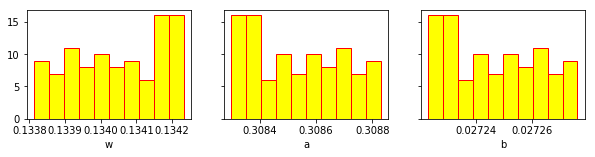

values for w and proportion
0.134 1.0

values for a and proportion
0.309 0.54
0.308 0.46

values for b and proportion
0.027 1.0

values for (w,a,b) and proportion
(0.134, 0.308, 0.027) 0.46
(0.134, 0.309, 0.027) 0.54


In [11]:
# plot the results
plt.rcParams["figure.figsize"] = [10,2]
fig, ax = plt.subplots(1, 3, sharey=True)
for i,(key,values) in enumerate(results.items()):
    values = sorted(values)
    ax[i].hist(values, label=key, facecolor='yellow', edgecolor='red')
    ax[i].set_xlabel(key)
    
plt.show()
plt.close()

# print results
for key,val in results.items():
    print("values for {} and proportion".format(key))
    val = [round(v,3) for v in val]
    for v in set(val):
        print(v, val.count(v)/len(val))
    print()
    
print("values for (w,a,b) and proportion")
val = list()
for i in range(len(results['w'])):
    val.append((round(results['w'][i],3), round(results['a'][i],3), round(results['b'][i],3)))
for v in set(val):
    print(v, val.count(v)/len(val))

Set w,a,b to the most observed values and compute Q accordingly.

w, a, b =  0.112 0.389 0.023


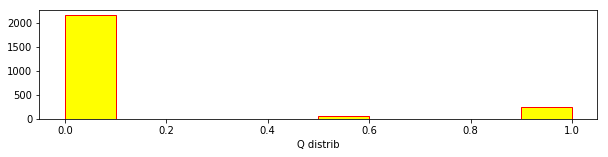

In [94]:
w, a, b = max([(v, val.count(v)/len(val)) for v in set(val)], key=itemgetter(1))[0]
for (i,j) in node_pairs:
    Q[i,j] = w * a**E[i,j] * (1-a)**(N[i,j]-E[i,j])
    Q[i,j] /= w * a**E[i,j] * (1-a)**(N[i,j]-E[i,j]) + (1-w) * b**E[i,j] * (1-b)**(N[i,j]-E[i,j])
print("w, a, b = ", w,a,b)
plt.hist(Q.values(), facecolor='yellow', edgecolor='red')
plt.xlabel("Q distrib")
plt.show()
plt.close()

## 3. Result analysis

### 3.1 Plots

Plot E/N vs Q.

Text(0, 0.5, 'a posteriori edge proba')

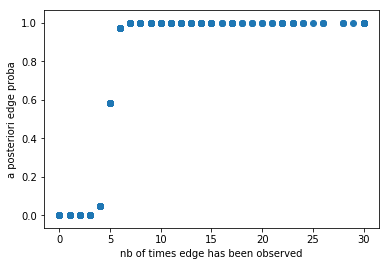

In [95]:
plt.rcParams["figure.figsize"] = [6,4]
x2plot = [E[e] for e in node_pairs]
y2plot = [Q[e] for e in node_pairs]
plt.scatter(x2plot, y2plot)
plt.xlabel("nb of times edge has been observed")
plt.ylabel("a posteriori edge proba")

Get real graph.

In [96]:
G = nx.DiGraph()
G.add_nodes_from(users)

for line in open("../Datasets/leadgraph_test.txt"):
    line = line.split()
    user = int(line[0])
    for leader in line[1:]:
        leader = int(leader)
        G.add_edge(leader, user)

Estimate $\omega$ from real graph and get real values of $a,b$.

In [97]:
print("w,a,b form Newman algo : ", w,a,b,'\n')

w_estimated_from_real_graph = G.number_of_edges() / (2*binom(n,2))
print("estimated w from real graph = ", w_estimated_from_real_graph)

a_numerator, a_denominator = 0, 0
for e in G.edges:
    a_numerator += E[e]
    a_denominator += N[e]
print("real a = ", a_numerator/a_denominator)

b_numerator, b_denominator = 0, 0
for e in node_pairs:
    if e not in G.edges:
        b_numerator += E[e]
        b_denominator += N[e]
print("real b = ", b_numerator/b_denominator)

w,a,b form Newman algo :  0.112 0.389 0.023 

estimated w from real graph =  0.10163265306122449
real a =  0.05515394912985275
real b =  0.06543995153718007


Compare expected degrees.

In [100]:
expected_deg = 2*sum(Q.values())/n
var = 4*sum([q*(1-q) for q in Q.values()]) / n**2
std = np.sqrt(var)
print("Expected degree observed : {:.3f} with variance {:.3f} and std_dev {:.3f}".format(expected_deg, var, std))
print("Expected degree estimated from real graph : {:.3f}".format(np.mean(G.degree())))

Expected degree observed : 11.069 with variance 0.028 and std_dev 0.169
Expected degree estimated from real graph : 17.230


### 3.2 Sample generation

We generate several sample graphs according to the posterior distribution. We compare their edges with edges from the real graph.

In [99]:
n_samples = 1000
prop_sampleEdges_in_real = list()
prop_realEdges_in_sample = list()

for k in range(n_samples):
    
    # sample graph
    G_sample = nx.DiGraph()
    G_sample.add_nodes_from(users)
    for e in node_pairs:
        if random.random() < Q[e]:
            G_sample.add_edge(e[1], e[0])
            
    # compare edges in sample with real graph
    prop_sampleEdges_in_real = len([e for e in G_sample.edges if e in G.edges]) / G_sample.number_of_edges()
    prop_realEdges_in_sample = len([e for e in G.edges if e in G_sample.edges]) / G.number_of_edges()
    
# print results
print("Mean prop of sample edges present in real graph : ", np.mean(prop_sampleEdges_in_real))
print("Mean prop of real edges present in sample graph : ", np.mean(prop_realEdges_in_sample))

Mean prop of sample edges present in real graph :  0.5448028673835126
Mean prop of real edges present in sample graph :  0.6104417670682731


## 4. Unused

Reduce the scale of N and E to avoid floats problems.

In [27]:
# def scaling(x, I1, I2):
#     # scales x from interval I1=[A,B] to I2=[a,b]
#     A, B = I1[0], I1[1]
#     a, b = I2[0], I2[1]
#     return ((b-a)*x + a*B - A*b) / (B-A)

# I1 = (min(E.values()), max(N.values()))
# I2 = (2,4)
# for e in N:
#     N[e] = scaling(N[e], I1, I2)
#     E[e] = scaling(E[e], I1, I2)
    
# # old scaling
# scaling_factor = 20 / max(E.values())
# for e in N:
#     N[e] *= scaling_factor
#     E[e] *= scaling_factor